In [70]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# analysis of walmart data from year 2020-24

In [ ]:
import yfinance as yf

# Define the stock ticker and time period
ticker = "WMT"
start_date = "2020-01-01"
end_date = "2024-12-31"

# Download the data
wmt_data = yf.download(ticker, start=start_date, end=end_date)

# Save to a CSV file
wmt_data.to_csv("WMT_2020_2024.csv")

print("Data downloaded and saved as WMT_2020_2024.csv")


In [ ]:
import pandas as pd

In [ ]:
# Load the data
wmt_data = pd.read_csv("WMT_2020_2024.csv")

# Display the first few rows
print(wmt_data.head())


In [ ]:
# preprosessing step
# Convert 'Date' to datetime format
wmt_data['Date'] = pd.to_datetime(wmt_data['Date'])

# Set 'Date' as the index
wmt_data.set_index('Date', inplace=True)

# Display the summary of the DataFrame
print(wmt_data.info())


In [ ]:
#line plot- Walmart Stock Closing Prices (2020-2024)
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Plot the closing price
plt.figure(figsize=(14, 7))
sns.lineplot(data=wmt_data, x=wmt_data.index, y='Close')
plt.title("Walmart Stock Closing Prices (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


In [ ]:
# Plot the trading volume
plt.figure(figsize=(14, 7))
sns.lineplot(data=wmt_data, x=wmt_data.index, y='Volume', color='orange')
plt.title("Walmart Trading Volume (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


In [ ]:
# Calculate moving averages
wmt_data['30 Day MA'] = wmt_data['Close'].rolling(window=30).mean()
wmt_data['100 Day MA'] = wmt_data['Close'].rolling(window=100).mean()

# Plot closing price with moving averages
plt.figure(figsize=(14, 7))
sns.lineplot(data=wmt_data, x=wmt_data.index, y='Close', label='Close')
sns.lineplot(data=wmt_data, x=wmt_data.index, y='30 Day MA', label='30 Day MA')
sns.lineplot(data=wmt_data, x=wmt_data.index, y='100 Day MA', label='100 Day MA')
plt.title("Walmart Stock Closing Prices with Moving Averages (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [ ]:
# Calculate the correlation matrix
correlation_matrix = wmt_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Metrics")
plt.show()


In [66]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


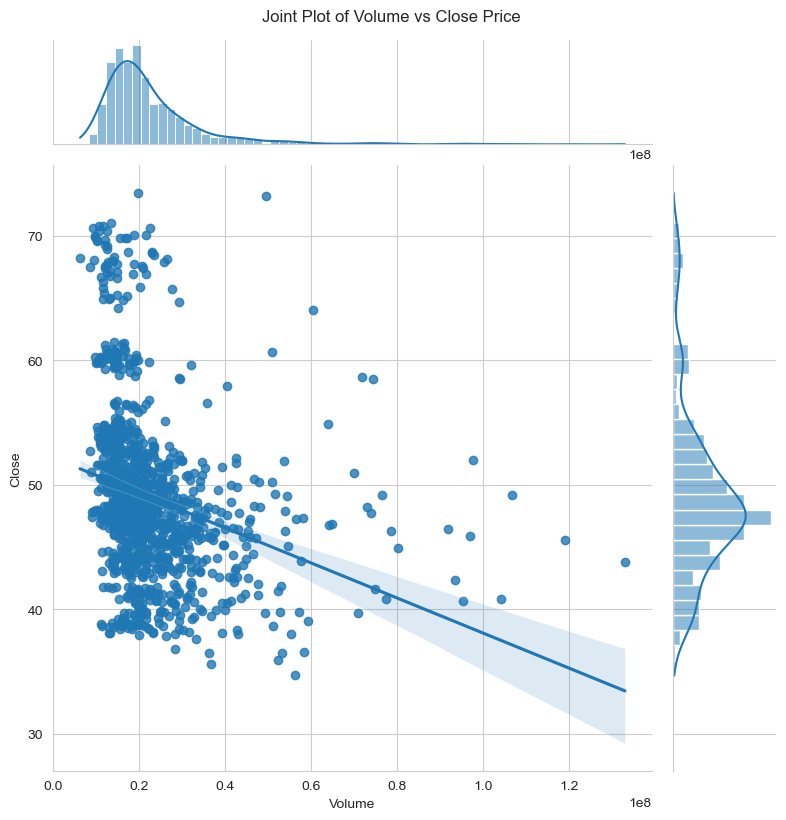

In [74]:
# Create a joint plot of Volume vs Close price
sns.jointplot(data=wmt_data, x='Volume', y='Close', kind='reg', height=8)
plt.suptitle("Joint Plot of Volume vs Close Price", y=1.02)
plt.show()
